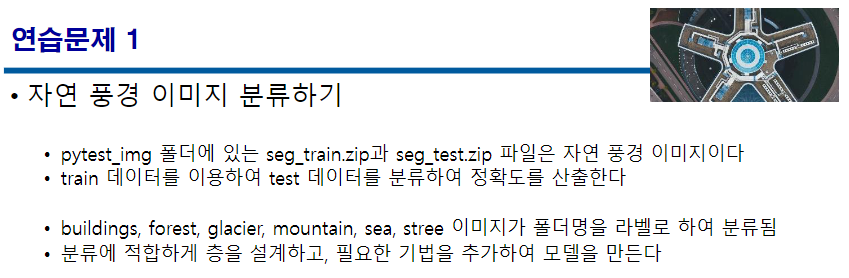

In [2]:
train_dir="c:\\pytest_img\\seg_train\\"
test_dir="c:\\pytest_img\\seg_test\\"
image_height=20
image_width=20
channels=3

In [3]:
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from glob import glob

category_list=[l.split('\\')[-1] for l in glob(train_dir+'*')]

In [4]:
category_list

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen=ImageDataGenerator(
    rescale=1./255
    )

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(image_height,image_width),batch_size=128,class_mode='categorical',classes=category_list)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(image_height,image_width),batch_size=128,class_mode='categorical',classes=category_list)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),input_shape=(image_height,image_width,channels),activation='relu'))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(6,activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [8]:
history1=model.fit(train_generator,epochs=20,batch_size=128,validation_data=test_generator)

Epoch 1/20
110/110 [==============================] - 15s 134ms/step - loss: 1.4888 - acc: 0.4024 - val_loss: 1.2568 - val_acc: 0.5097
Epoch 2/20
110/110 [==============================] - 14s 128ms/step - loss: 1.2831 - acc: 0.5002 - val_loss: 1.2694 - val_acc: 0.5103
Epoch 3/20
110/110 [==============================] - 14s 125ms/step - loss: 1.1848 - acc: 0.5477 - val_loss: 1.1453 - val_acc: 0.5700
Epoch 4/20
110/110 [==============================] - 14s 131ms/step - loss: 1.1381 - acc: 0.5701 - val_loss: 1.0317 - val_acc: 0.6027
Epoch 5/20
110/110 [==============================] - 15s 132ms/step - loss: 1.0950 - acc: 0.5876 - val_loss: 0.9842 - val_acc: 0.6313
Epoch 6/20
110/110 [==============================] - 14s 131ms/step - loss: 1.0587 - acc: 0.5995 - val_loss: 0.8446 - val_acc: 0.6837
Epoch 7/20
110/110 [==============================] - 14s 132ms/step - loss: 1.0348 - acc: 0.6123 - val_loss: 0.9540 - val_acc: 0.6477
Epoch 8/20
110/110 [==============================] - 1

In [7]:
history1=model.fit(train_generator,epochs=20,batch_size=128,validation_data=test_generator)

Epoch 1/20
110/110 [==============================] - 14s 131ms/step - loss: 1.3246 - acc: 0.4740 - val_loss: 1.2935 - val_acc: 0.4903
Epoch 2/20
110/110 [==============================] - 15s 135ms/step - loss: 1.2228 - acc: 0.5226 - val_loss: 0.9940 - val_acc: 0.6167
Epoch 3/20
110/110 [==============================] - 16s 144ms/step - loss: 1.1686 - acc: 0.5485 - val_loss: 1.0094 - val_acc: 0.6087
Epoch 4/20
110/110 [==============================] - 16s 146ms/step - loss: 1.1333 - acc: 0.5648 - val_loss: 1.0172 - val_acc: 0.6177
Epoch 5/20
110/110 [==============================] - 16s 142ms/step - loss: 1.0962 - acc: 0.5807 - val_loss: 0.8692 - val_acc: 0.6820
Epoch 6/20
110/110 [==============================] - 17s 154ms/step - loss: 1.0746 - acc: 0.5953 - val_loss: 0.9718 - val_acc: 0.6400
Epoch 7/20
110/110 [==============================] - 16s 141ms/step - loss: 1.0546 - acc: 0.6057 - val_loss: 0.8945 - val_acc: 0.6793
Epoch 8/20
110/110 [==============================] - 1

In [9]:
model.predict(test_generator)

array([[2.44937629e-01, 1.33158825e-02, 2.52278410e-02, 2.27992106e-02,
        9.04660597e-02, 6.03253365e-01],
       [7.05328910e-03, 4.17826785e-04, 9.03150380e-01, 7.22680464e-02,
        1.13668600e-02, 5.74360415e-03],
       [6.78588673e-02, 7.98100293e-01, 8.74878839e-04, 1.47200481e-04,
        7.25789927e-04, 1.32292822e-01],
       ...,
       [9.32463467e-01, 1.25869235e-03, 9.56720207e-03, 2.17260476e-02,
        1.89587306e-02, 1.60260443e-02],
       [5.79937398e-01, 2.31038705e-02, 4.25355975e-03, 4.91612265e-03,
        2.60858554e-02, 3.61703157e-01],
       [1.75217880e-04, 9.99582827e-01, 5.01008253e-06, 5.52568167e-07,
        9.91944304e-08, 2.36293752e-04]], dtype=float32)

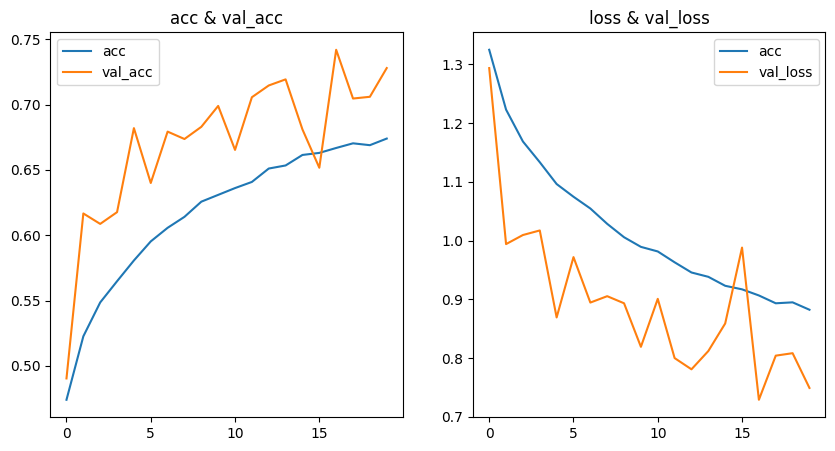

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(len(history1.history['acc'])),history1.history['acc'],label='acc')
plt.plot(range(len(history1.history['val_acc'])),history1.history['val_acc'],label='val_acc')
plt.title('acc & val_acc')
plt.legend()
plt.subplot(122)
plt.plot(range(len(history1.history['loss'])),history1.history['loss'],label='acc')
plt.plot(range(len(history1.history['val_loss'])),history1.history['val_loss'],label='val_loss')
plt.title('loss & val_loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_generator)

24/24 [==============================] - 1s 58ms/step - loss: 0.7492 - acc: 0.7280


[0.7492076754570007, 0.7279999852180481]

In [10]:
pred_dir = "C:/pytest_img/seg_pred/"
pred_datagen = ImageDataGenerator(rescale=1./255)
pred_generator = pred_datagen.flow_from_directory(pred_dir, target_size=(
    image_height, image_width), batch_size=128, class_mode=None, shuffle=False)
pred_generator.reset()
# filenames=pred_generator.filenames
pred = model.predict_generator(pred_generator, verbose=1)
predicted_class_indices = np.argmax(pred, axis=1)
labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


Found 14602 images belonging to 1 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
115/115 [==============================] - 27s 239ms/step


In [15]:
key = dict((v, k) for k, v in labels.items())

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [21]:
import shutil,os
from tqdm import tqdm
num=dict((v,1) for v in key.keys())
folder = "C:\\pytest_img\\seg_pred\\seg_pred\\"
for filename, classname in tqdm(list(zip(pred_generator.filenames, predictions))):
    filename=filename.split('\\')[-1]
    if not os.path.exists(folder+classname):
        os.makedirs(folder+classname)
    shutil.copyfile(folder+filename, folder+classname+ "\\"+classname+"_"+f"{num[classname]:03d}"+".jpg") #building1004.jpg
    num[classname]+=1

100%|██████████| 14602/14602 [00:07<00:00, 1957.46it/s]
